In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [3]:
user = 'psb62/'
user = 'Sungbeen Park/'
face_dir = 'C:/Users/'+user+'MATLAB Drive/eigenface/Original/'
n = 20
root_dir = 'C:/Users/'+user+'OneDrive/conda test/PCA/'

In [4]:
faces = np.array([rgb2gray(mpimg.imread(face_dir+'%d.png' % (i+1))) for i in range(n)])
faces.shape

(20, 45, 40)

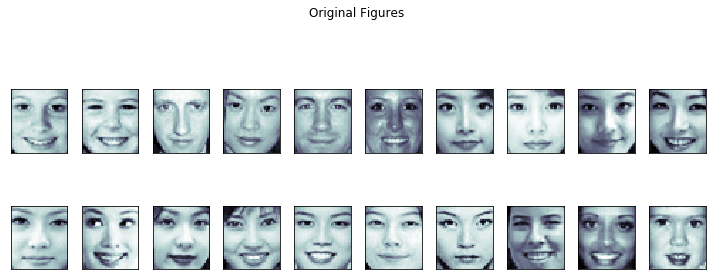

In [5]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
row = 2
col = 10
for i in range(row):
    for j in range(col):
        k = i * col + j
        ax = fig.add_subplot(row, col, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("Original Figures")
plt.tight_layout()
plt.show()

In [7]:
temp = faces.reshape(20,45*40)
temp = np.array(temp)
faces = temp
faces.shape

(20, 1800)

In [24]:
pca = PCA(n_components=20)
#pca = PCA()
print(pca)
X = pca.fit_transform(faces) # X is projection on eigenvectors
print(X.shape)
mat_cov = pca.get_covariance()
print(mat_cov.shape)

PCA(n_components=20)
(20, 20)
(1800, 1800)


In [25]:
faces_tilde = pca.inverse_transform(X)
faces_tilde.shape

(20, 1800)

In [26]:
temp = faces_tilde.reshape(20,45,40)
faces_tilde = temp
faces_tilde.shape

(20, 45, 40)

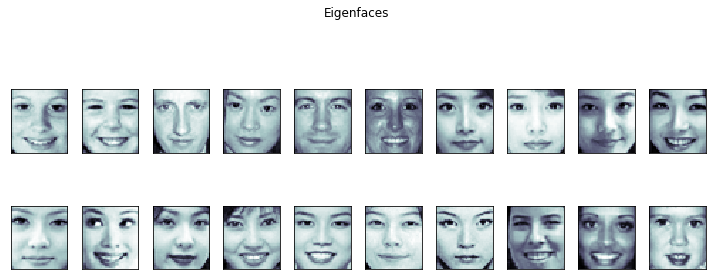

In [27]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
row = 2
col = 10
for i in range(row):
    for j in range(col):
        k = i * col + j
        ax = fig.add_subplot(row, col, k+1)
        ax.imshow(faces_tilde[k,:], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("Eigenfaces")
plt.tight_layout()
plt.show()